# Reproducing Villena-Gonzalez CDA Study (2019)

### Notes:
- 'ER290419.bdf' (Cond '1', there are 210 events, instead of 32)
- Different graph than paper (quite significantly) - can't reproduce the diff between 2 and 4 targets
- Channels with strong CDA are more frontal...

- Using -400ms to -200ms as a baseline correction from mem cue.

In [12]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Villena-Gonzalez-2019\\')
from events import get_specific_events, get_epochs, get_CDA
from events import prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

In [4]:
#==================================================================
# General Variables
#==================================================================
study_id = 'villena2019'

triggers = dict();

triggers['1'] = [10,11,12,13] 
triggers['2'] = [20,21,22,23]
triggers['4'] = [40,41,42,43]

triggers['left'] =  [10,13,20,23,40,43] #[11,12,21,22,41,42]
triggers['right'] = [11,12,21,22,41,42] #[10,13,20,23,40,43]

triggers['good'] = [60]
triggers['bad'] =  [61]
# --------------------------

# Labels
conds = ['1', '2', '4']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
chan_left =  ['TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1']

# Epoch information
epoch_length = 1.2
epoch_tmin = -0.4
baseline_corr = (-0.4, -0.2)

# CDA info
cda_window = (0.3, 0.9)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

Processing: AP140119.bdf...
Extracting EDF parameters from D:\CLNT\Data\Open Datasets\Villena-Gonzalez 2019\Data\AP140119.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 749567  =      0.000 ...   366.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
368 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
368 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing

D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:106: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 1, 13, 52, 94


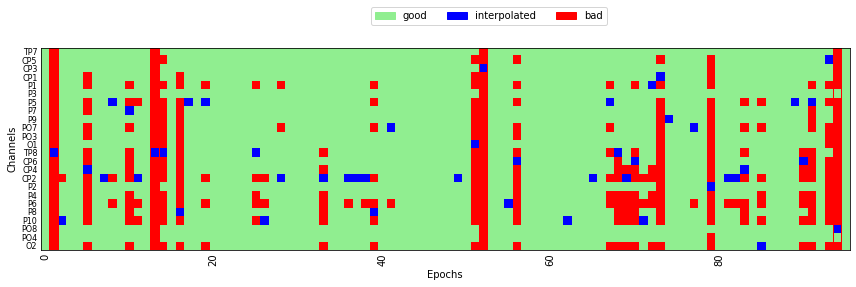

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[AP140119.bdf] Adding Mean CDA Amp for 1-left-good: -3.3127075901319545
[AP140119.bdf] Adding Mean CDA Amp for 1-left-bad: 5.5062623502204335
[AP140119.bdf] Adding Mean CDA Amp for 1-right-good: -1.032415013003593
[AP140119.bdf] Adding Mean CDA Amp for 1-right-bad: -4.0288642036674425
[AP140119.bdf] Adding Mean CDA Amp for 2-left-good: -4.355562683296253
[AP140119.bdf] Skipping: 2-left-bad
[AP140119.bdf] Adding Mean CDA Amp for 2-right-good: -3.9951304076494396
[AP140119.bdf] Adding Mean CDA Amp

D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:289: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:300: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:311: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


Processing: BG160419.bdf...
Extracting EDF parameters from D:\CLNT\Data\Open Datasets\Villena-Gonzalez 2019\Data\BG160419.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 782335  =      0.000 ...   382.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing

D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:106: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


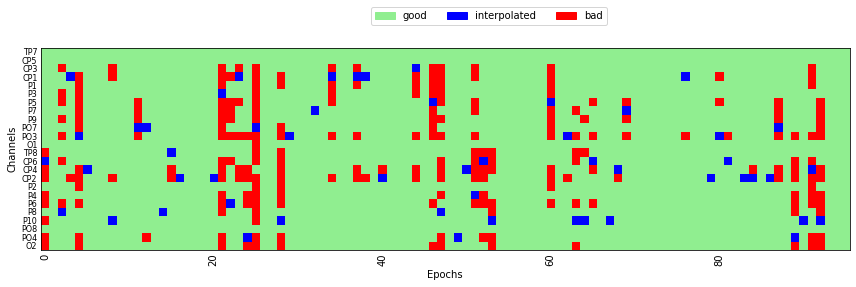

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[BG160419.bdf] Adding Mean CDA Amp for 1-left-good: 2.182065778890871
[BG160419.bdf] Adding Mean CDA Amp for 1-left-bad: -4.172785476103483
[BG160419.bdf] Adding Mean CDA Amp for 1-right-good: -0.4842086435314805
[BG160419.bdf] Skipping: 1-right-bad
[BG160419.bdf] Adding Mean CDA Amp for 2-left-good: 0.7900193325127134
[BG160419.bdf] Skipping: 2-left-bad
[BG160419.bdf] Adding Mean CDA Amp for 2-right-good: -1.4023020633227397
[BG160419.bdf] Adding Mean CDA Amp for 2-right-bad: 9.145820290622703


D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:289: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:300: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:311: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


Processing: BO090419.bdf...
Extracting EDF parameters from D:\CLNT\Data\Open Datasets\Villena-Gonzalez 2019\Data\BO090419.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 767999  =      0.000 ...   375.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing

D:\PhD\CDA-review\studies\Villena-Gonzalez-2019\events.py:106: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

KeyboardInterrupt: 

In [3]:
#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = 'D:\\CLNT\\Data\\Open Datasets\\Villena-Gonzalez 2019\\Data\\'
#directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/'
sep = '\\'

for filepath in glob.iglob(directory_path + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})
    
    # Set Electrodes Locations
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)

    # Resample
    preproc = raw.resample(1024)

    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproct.plot...
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict['2']['left']['good'].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
subreport = get_report(report, ['1','2', '4'], ['left','right'], ['good', 'bad'], [])
report

## 2. Plot Grand CDA Average

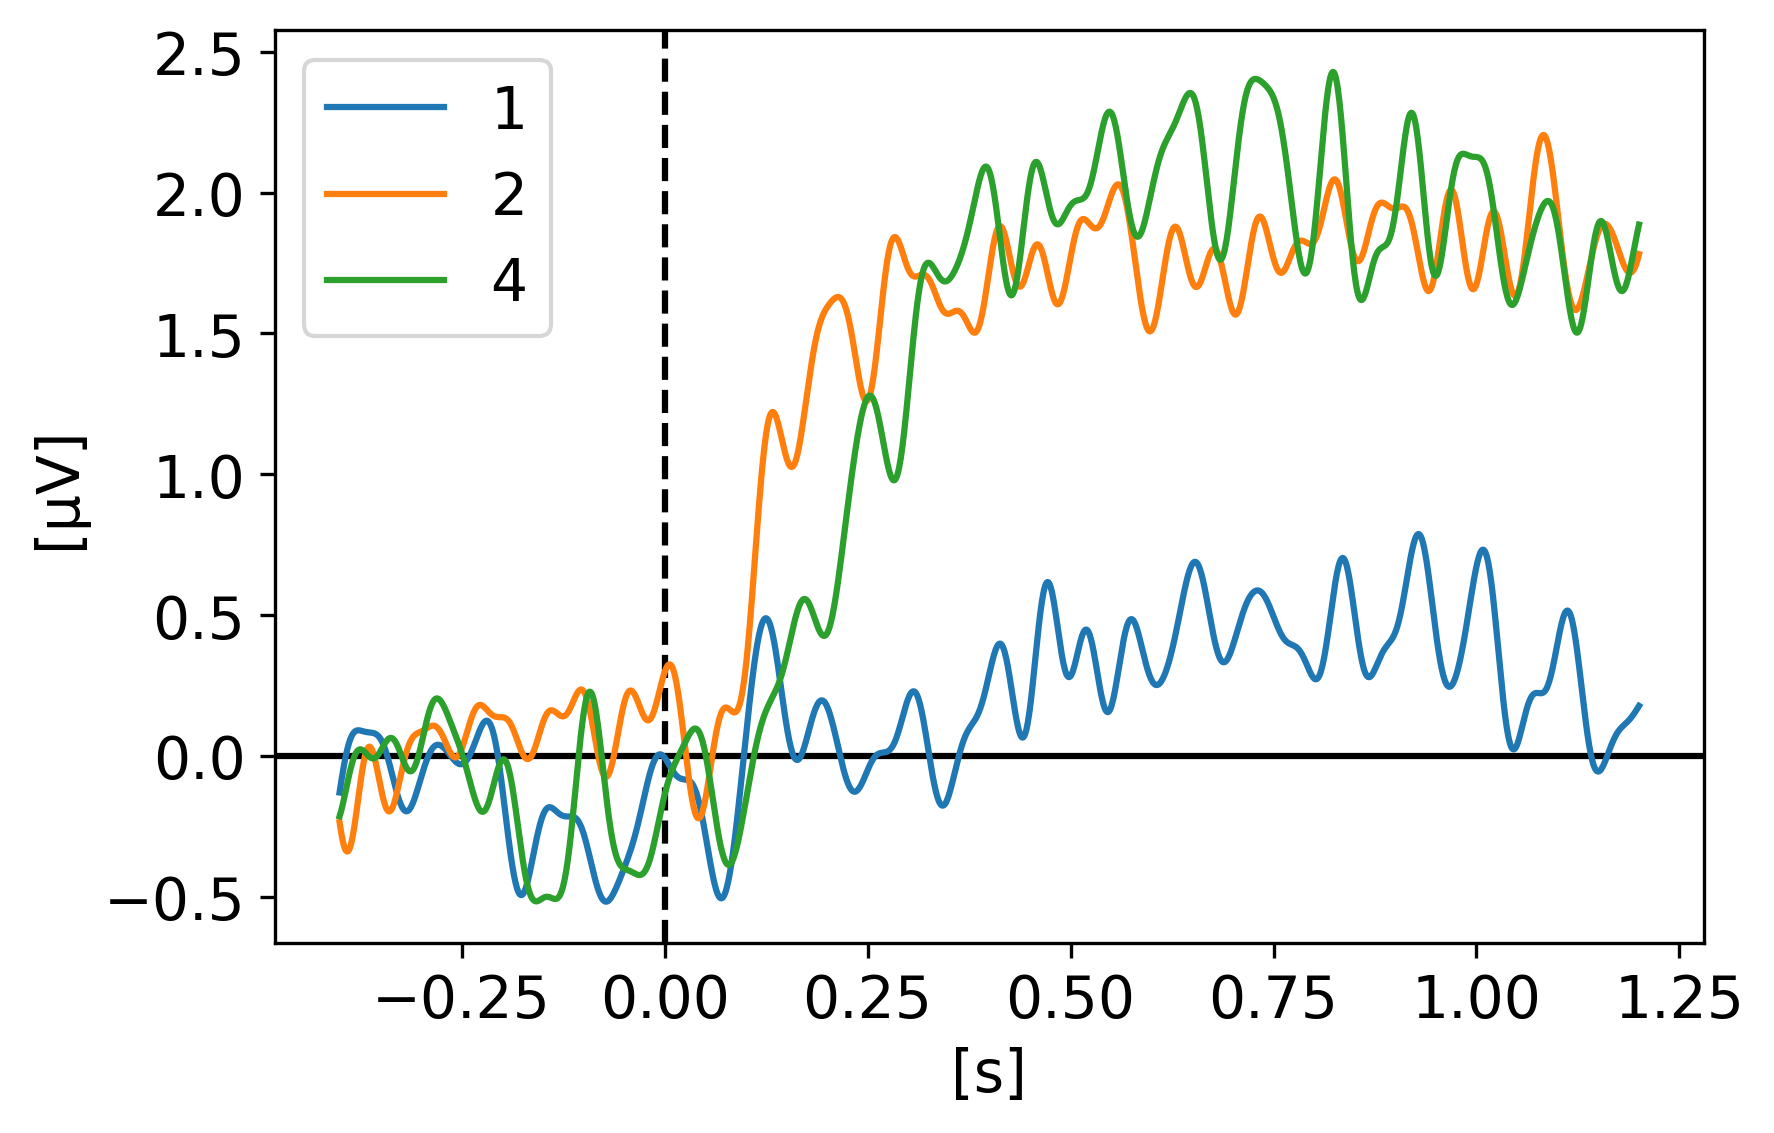

In [14]:
cda_all = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():
        if f == 'ER290419.bdf' and cond == '1':
            continue
        
        perf = 'good'
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Trigger: {})".format(str(f), str(t)))

plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(6, 4), dpi=300)
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.plot(times, cda_all['1'].mean(0) * 1e6, label='1')
plt.plot(times, cda_all['2'].mean(0) * 1e6, label='2')
plt.plot(times, cda_all['4'].mean(0) * 1e6, label='4')
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
plt.tight_layout()

fig.savefig("./Villena-Gonzalez-2019_CDA-reprod.png", format='png', dpi=300)

## Save CDA Data

In [5]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [13]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

23

## Analysis - Bad Perf Trials

==== SKIPPED: 0 points! (File: LS150419.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: LB020419.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: DR210119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: JC220119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: CA080119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: SS150119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: CS230419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: BO090419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: MM220419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: CM190319.bdf - Cond: 2)


Text(0.5, 0, '[s]')

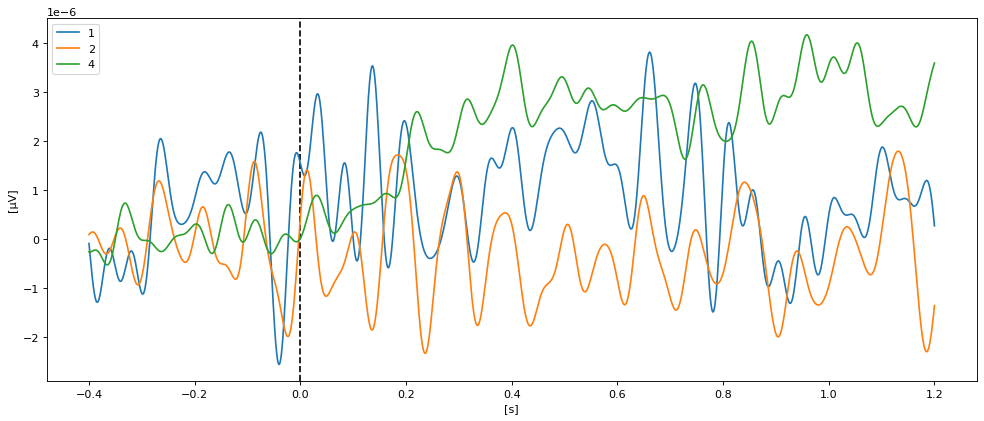

In [6]:
cda_all = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():
        if f == 'ER290419.bdf' and cond == '1':
            continue
        
        perf = 'bad'
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

plt.figure(figsize=(15, 6), dpi=80)
plt.axvline(x=0, color='k', linestyle='--')
plt.plot(times, cda_all['1'].mean(0), label='1')
plt.plot(times, cda_all['2'].mean(0), label='2')
plt.plot(times, cda_all['4'].mean(0), label='4')
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
#plt.savefig("./img/Villena-Gonzalez-2019_CDA-reprod.jpg", dpi=300)

## Analysis - Show Spread per subject

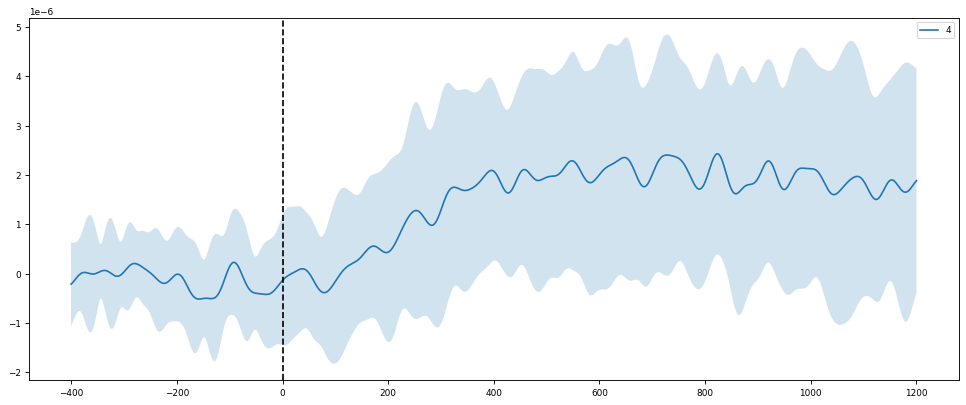

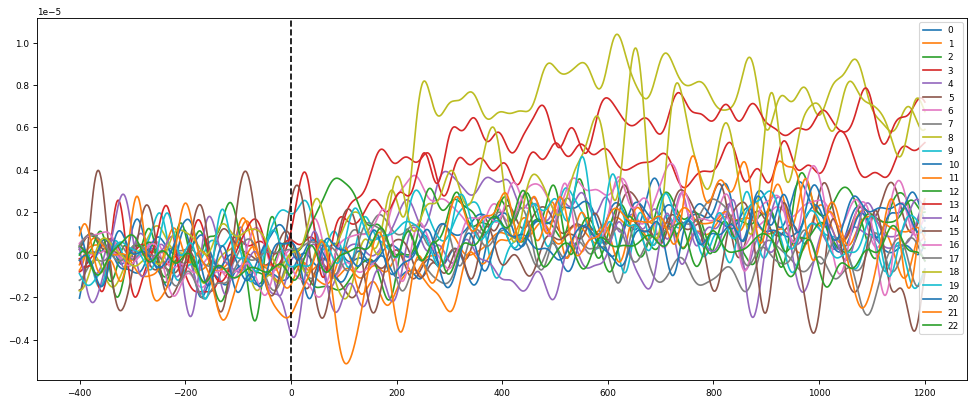

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_13218/1036151030.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 3, figsize=(15,6))


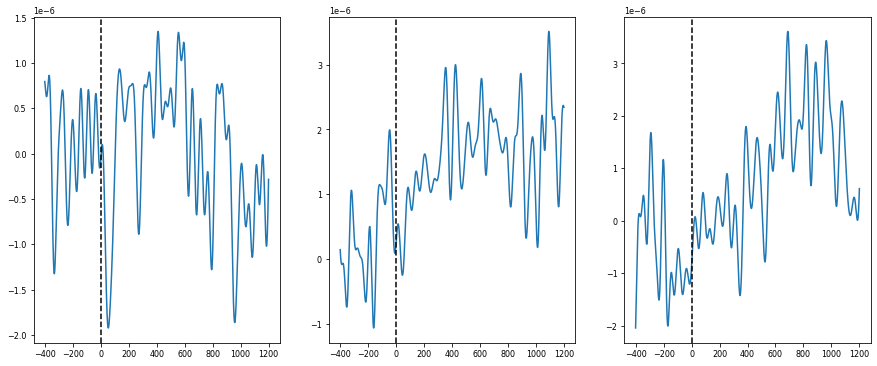

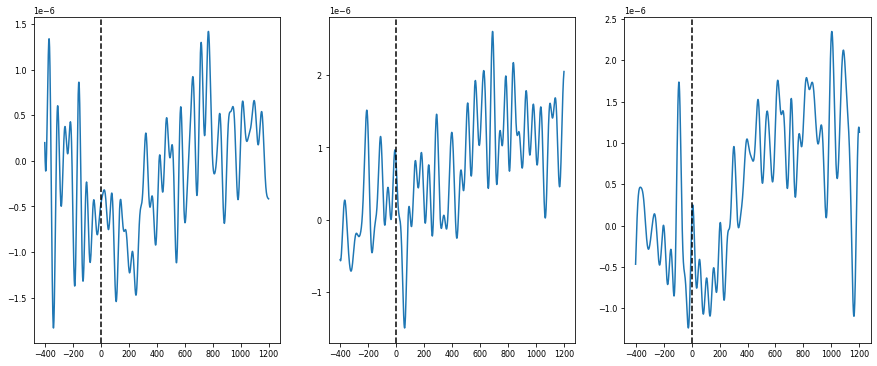

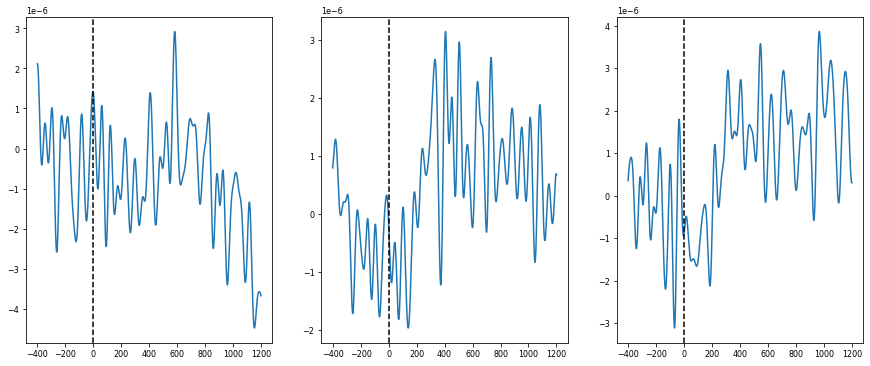

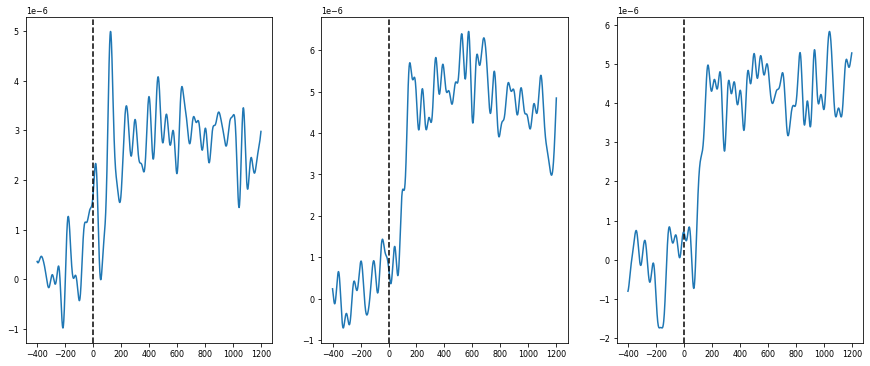

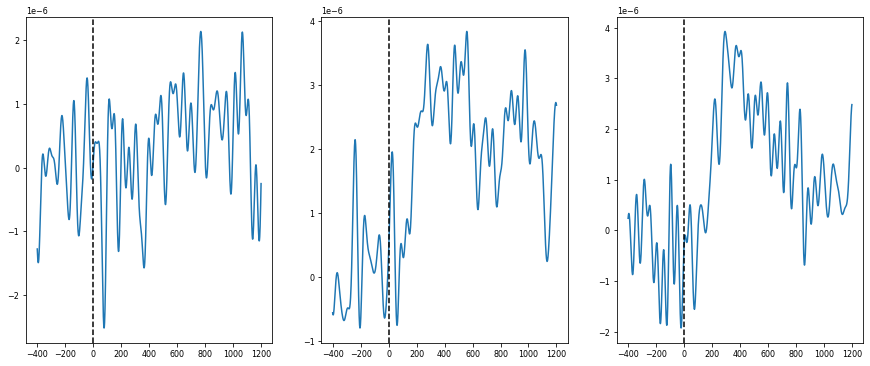

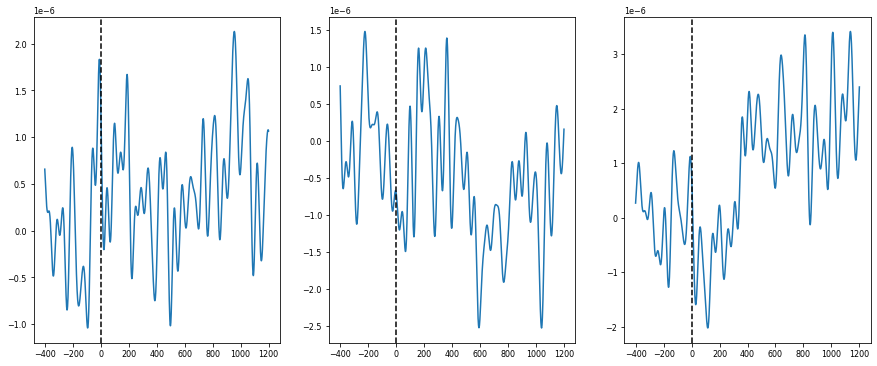

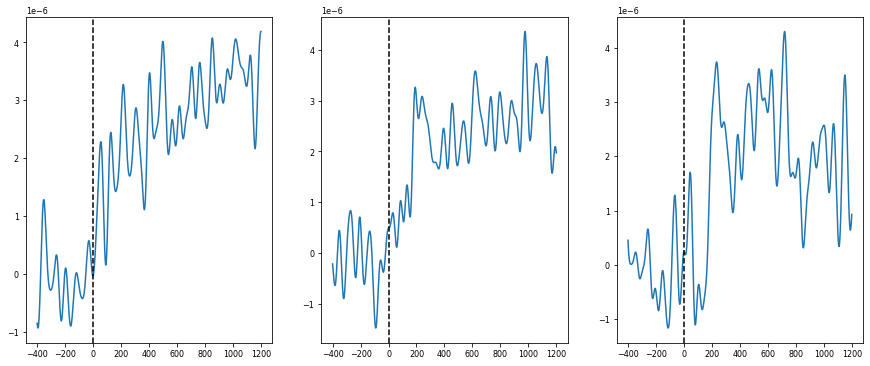

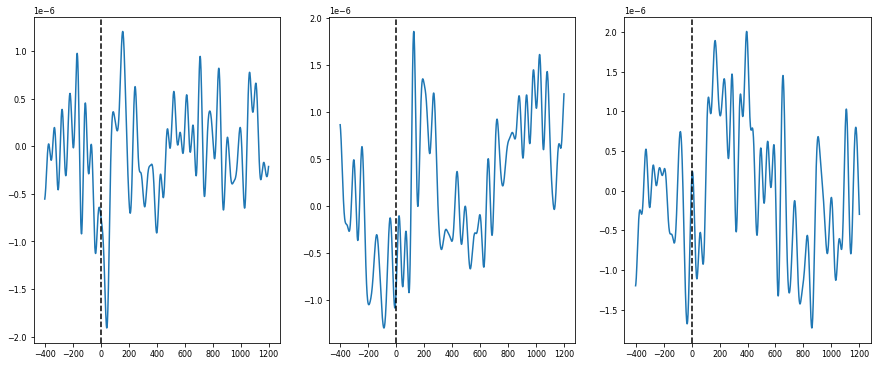

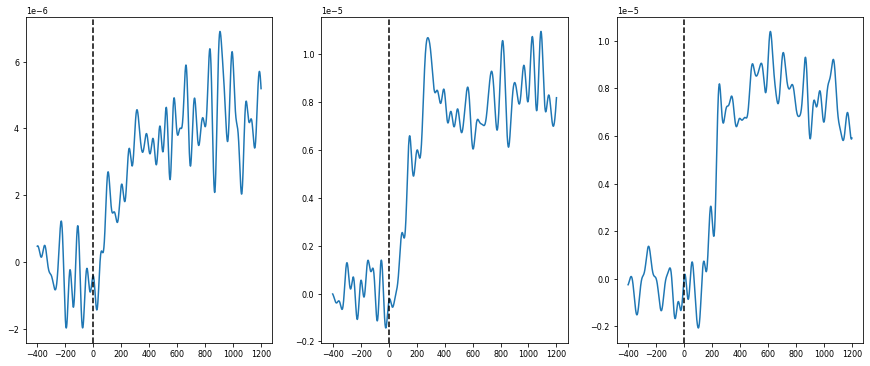

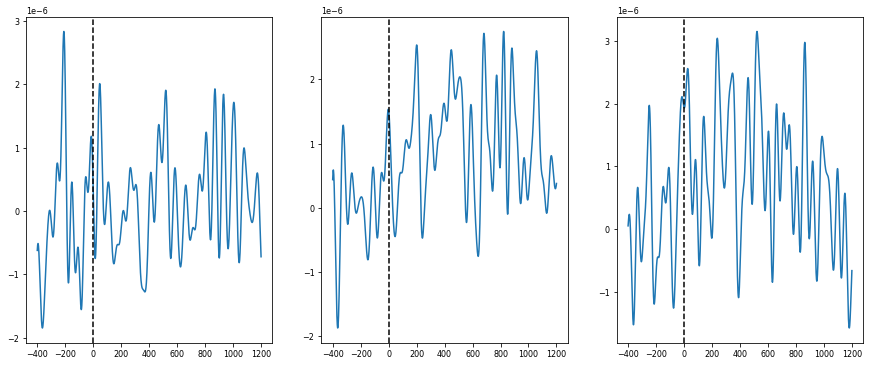

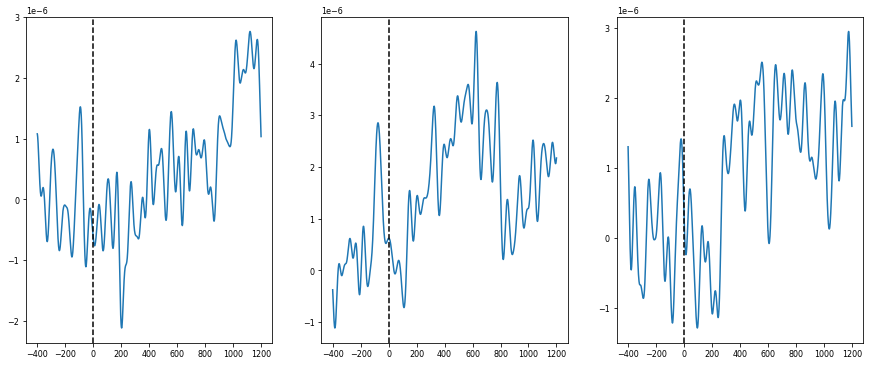

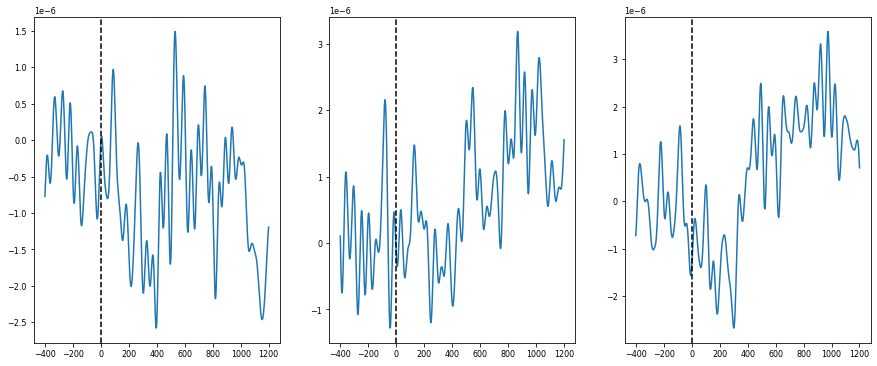

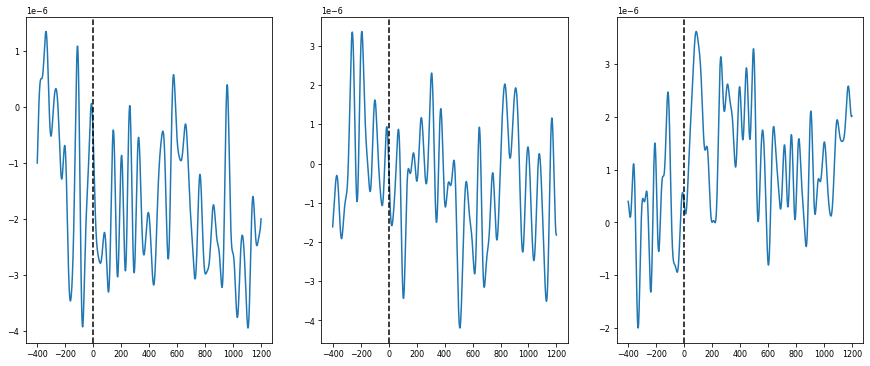

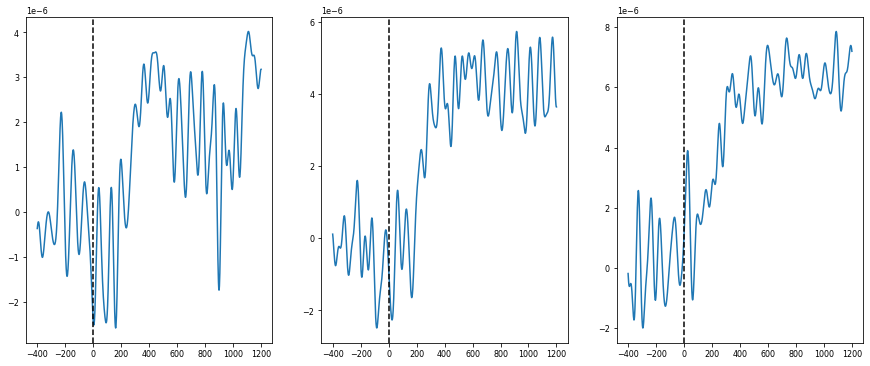

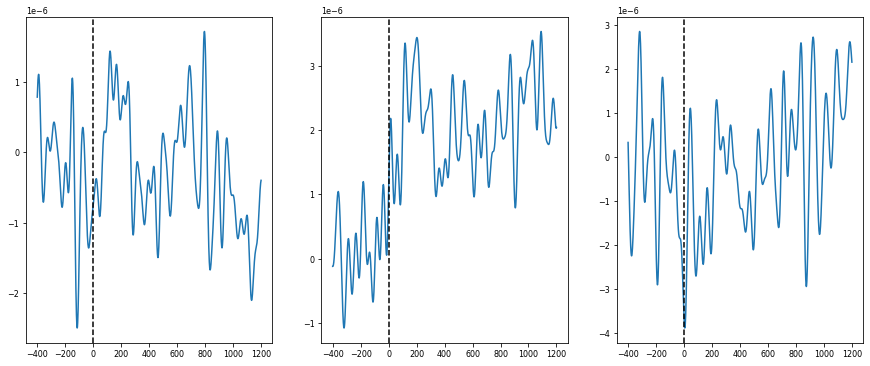

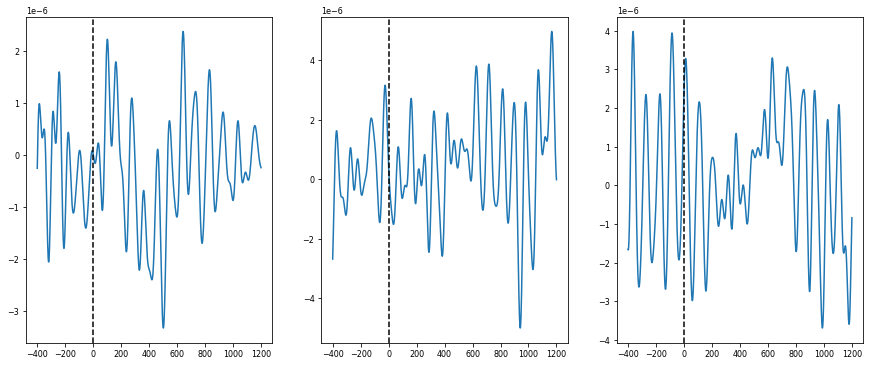

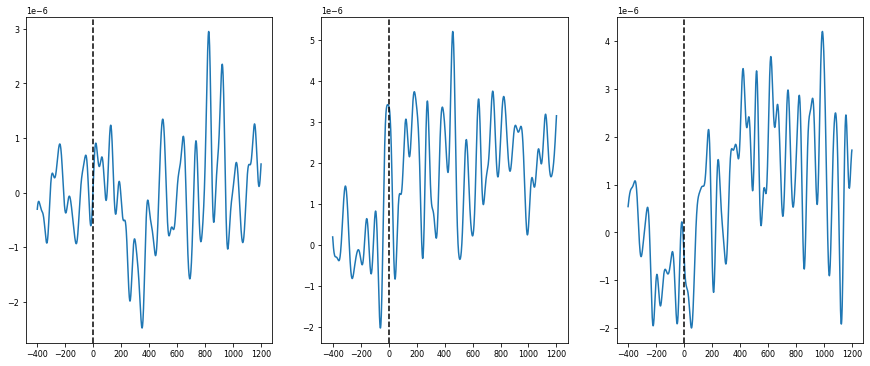

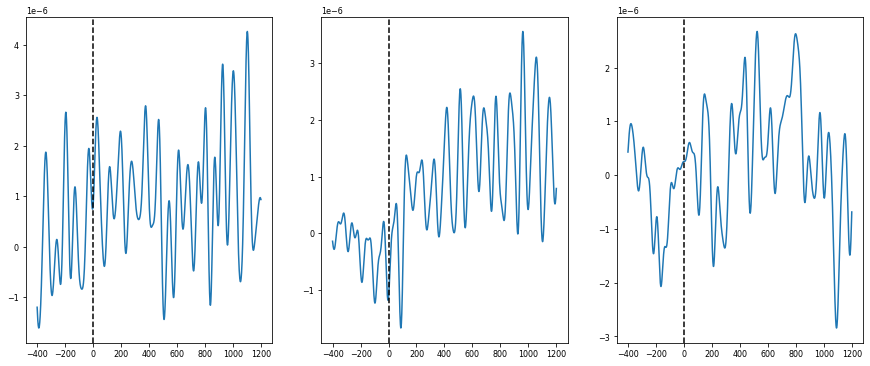

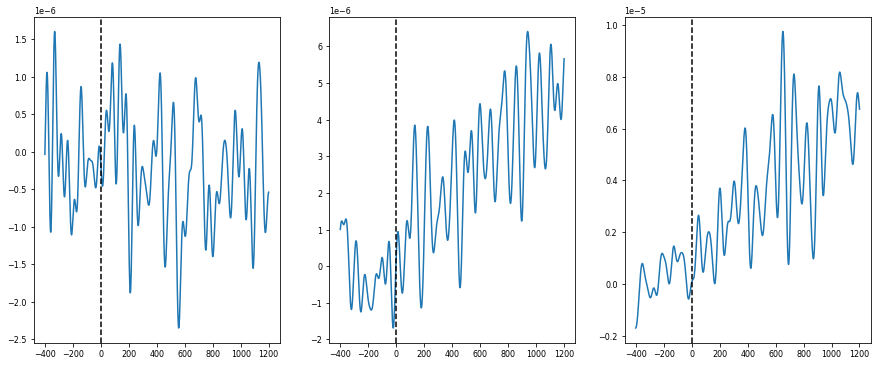

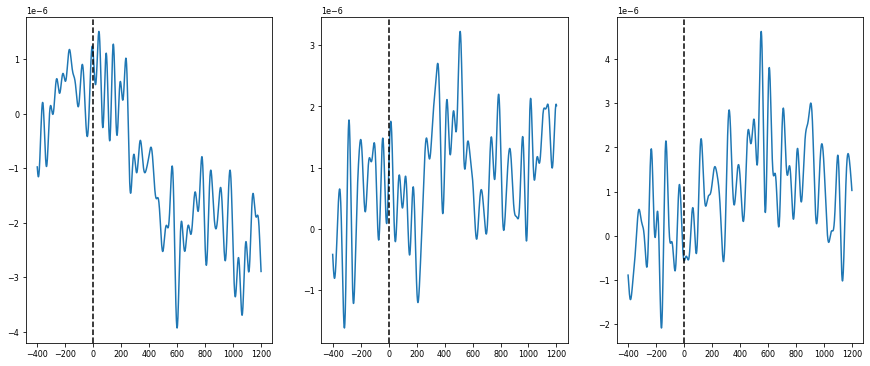

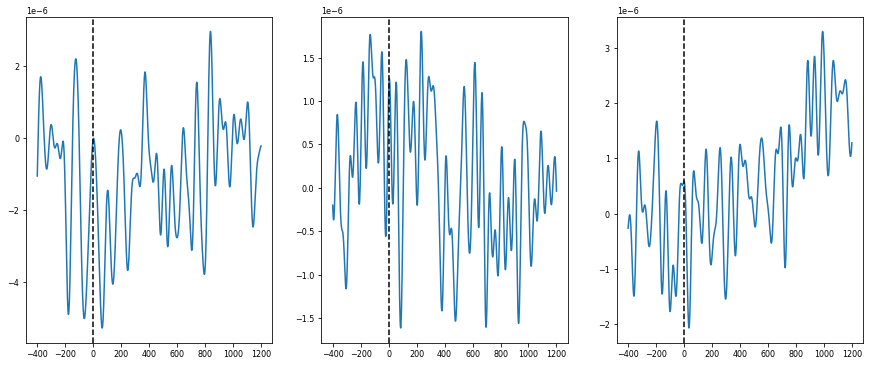

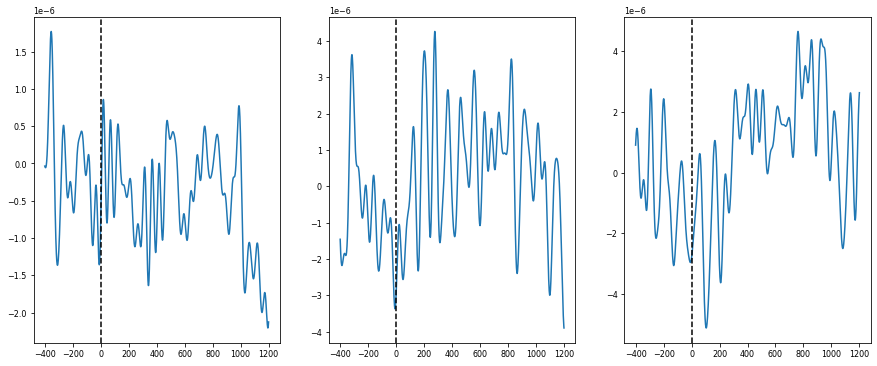

In [131]:
plt.figure(figsize=(15, 6), dpi=80)
means = cda_all['4'].mean(0)
stds = cda_all['4'].std(0)
plt.plot((times * 1000), means, label='4')
plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

plt.axvline(x=0, color='k', linestyle='--')
#plt.gca().invert_yaxis()
plt.legend()
plt.show()

plt.rcParams.update({'font.size': 8})

plt.figure(figsize=(15, 6), dpi=80)
for i in range(len(cda_all['4'])):
    plt.plot((times * 1000), cda_all['4'][i,:], label='{}'.format(i))

plt.axvline(x=0, color='k', linestyle='--')
#plt.gca().invert_yaxis()
plt.legend()
plt.show()

#plt.figure(figsize=(15, 6), dpi=80)
for i in range(len(cda_all['1'])):
    fig, axs = plt.subplots(1, 3, figsize=(15,6))
    axs[0].plot((times * 1000), cda_all['1'][i,:], label='{}'.format(i))
    axs[0].axvline(x=0, color='k', linestyle='--')
    axs[1].plot((times * 1000), cda_all['2'][i,:], label='{}'.format(i))
    axs[1].axvline(x=0, color='k', linestyle='--')
    axs[2].plot((times * 1000), cda_all['4'][i,:], label='{}'.format(i))
    axs[2].axvline(x=0, color='k', linestyle='--')
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

# Analysis - Performance Report

In [11]:
# Remove duplicated columns...
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

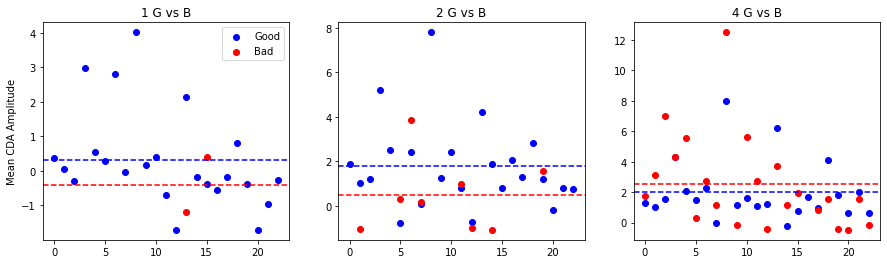

In [140]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    #axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')


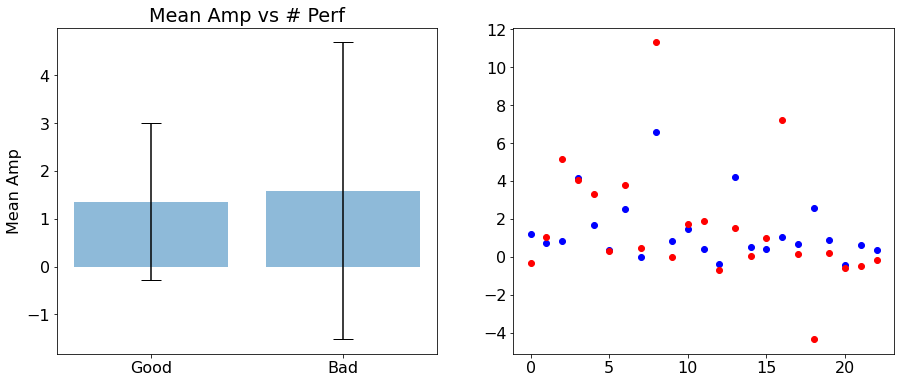

Corr Perf vs CDA Amp: (0.0458344762225355, 0.7622950400443369)


In [154]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
#axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

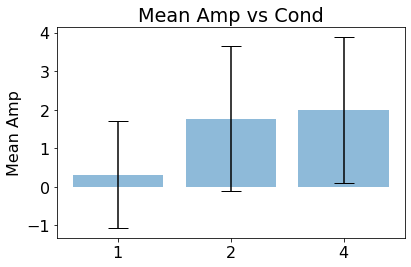

In [146]:
plt.rcParams.update({'font.size': 16})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Amp vs Cond')
#ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [147]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = [1,2,4]
for ss in set_sizes:
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(ss)
        y.append(value)

scipy.stats.pearsonr(x,y)

(0.3247785205574374, 0.00647387437632328)

## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (0.09143565233491678, 0.5456122094352885)


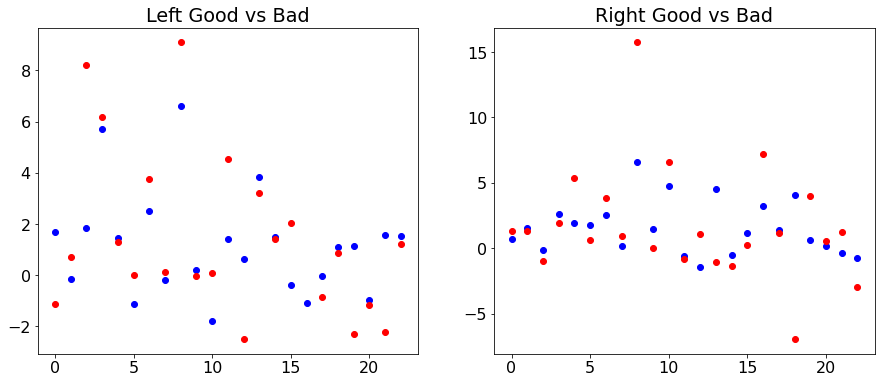

In [155]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ 1: (-0.12256348335173892, 0.5774439414924684)
Corr Perf Acc ~ 2: (0.2757355054093133, 0.20284173747658596)
Corr Perf Acc ~ 4: (0.27895702662125355, 0.197400300766486)


Text(0, 0.5, 'CDA Mean Amp')

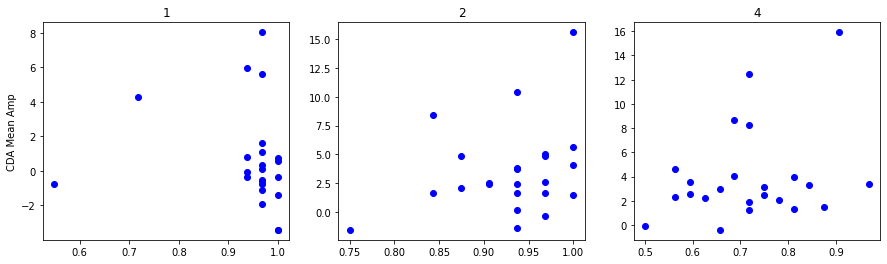

In [138]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    #axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

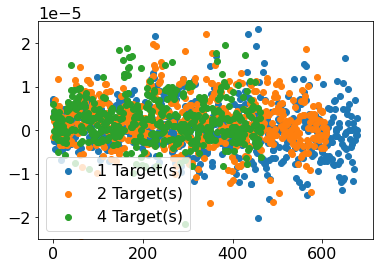

In [122]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()
    #axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    #axs[i].set_title('{} Target(s)'.format(cond))

## Trials: Good vs Bad

Cond = 1 Targets: 679 Good Perf Trials vs 101 Bad Perf Trials, with 3 outliers on graph.
Cond = 2 Targets: 610 Good Perf Trials vs 48 Bad Perf Trials, with 3 outliers on graph.
Cond = 4 Targets: 465 Good Perf Trials vs 182 Bad Perf Trials, with 2 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

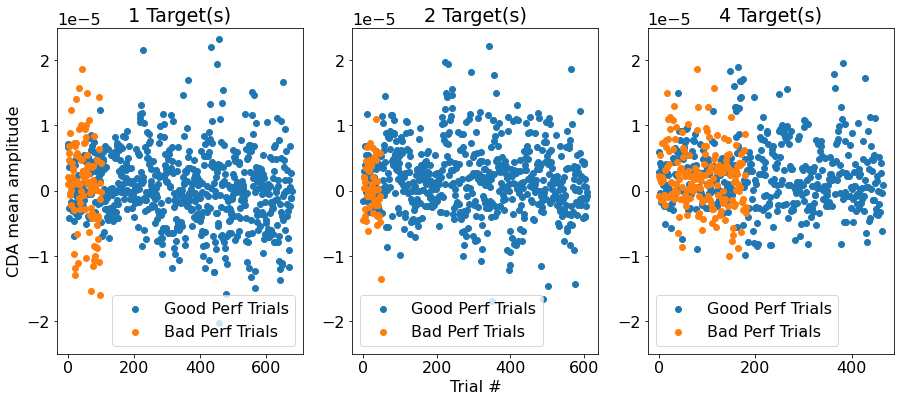

In [139]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = 1 Targets: 338 Good Left Trials vs 341 Good Right Trials, with 3 outliers on graph
Cond = 2 Targets: 305 Good Left Trials vs 305 Good Right Trials, with 3 outliers on graph
Cond = 4 Targets: 234 Good Left Trials vs 231 Good Right Trials, with 2 outliers on graph


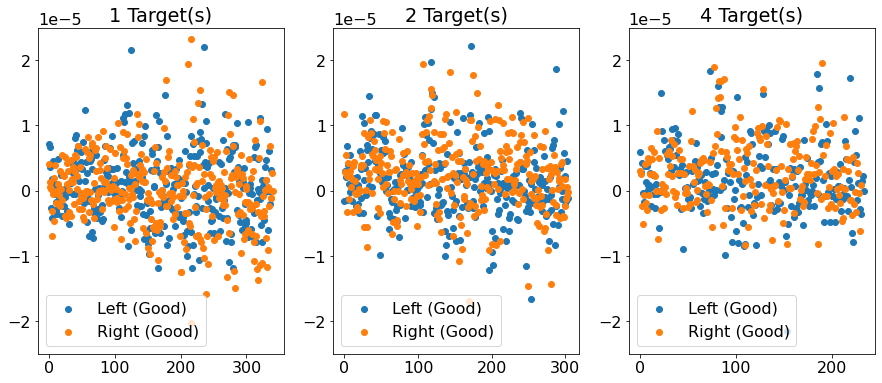

In [117]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        

In [104]:
meancda_df = pd.DataFrame(columns=['Subject_ID', 'CDA_1', 'CDA_2', 'CDA_4', 'CDA', 'ACC_1', 'ACC_2', 'ACC_4', 'ACC'])

for subj in report.index:
    # --------------------------
    # 1) Add Mean CDA to DF
    # Taking all CDA window from all trials.
    # (i.e. conds x sides x perfs)
    # This represented the Overall Avg Mean CDA (with clean EEG trials)
    # --------------------------
    cda_mean = dict()
    for cond in conds:
        cda_mean[cond] = []
        for side in sides:
            for perf in perfs:
                if perf in perf_report_all[subj][cond][side].keys():
                    for trial_cda in perf_report_all[subj][cond][side][perf]:
                        cda_mean[cond].append(trial_cda)
    cda_ga_means = [val for cond in cda_mean.keys() for val in cda_mean[cond]]             
    meancda_df = meancda_df.append({'Subject_ID':subj, 'CDA_1':np.mean(cda_mean['1'],0), 'CDA_2':np.mean(cda_mean['2'],0), 'CDA_4':np.mean(cda_mean['4'],0), 'CDA':np.mean(cda_ga_means,0)}, ignore_index=True)
    
    # --------------------------
    # 2) Add Accuracy to DF
    # Accuracy includes trials where EEG was removed/cleaned. (more trials in Acc than CDA)
    # --------------------------
    for cond in conds:
        cur_goods = report.at[subj, '{}-good'.format(cond)]
        cur_bads = report.at[subj, '{}-bad'.format(cond)] 
        meancda_df.at[meancda_df['Subject_ID'] == subj, 'ACC_{}'.format(cond)] =  cur_goods / (cur_goods + cur_bads)
    
    total_acc = meancda_df[meancda_df['Subject_ID'] == subj][['ACC_1', 'ACC_2', 'ACC_4']].mean(1)
    meancda_df.at[meancda_df['Subject_ID'] == subj, 'ACC'] = total_acc
    
meancda_df

,Subject_ID,CDA_1,CDA_2,CDA_4,CDA,ACC_1,ACC_2,ACC_4,ACC
0,LS150419.bdf,3.819181e-07,1.645808e-06,1.550827e-06,1.202526e-06,1.000000,0.93750,0.59375,0.843750
1,DN250319.bdf,-2.452320e-08,7.687930e-07,1.388988e-06,7.272530e-07,0.968750,0.87500,0.78125,0.875000
2,LF210119.bdf,-5.028599e-07,1.586529e-06,2.382465e-06,1.192690e-06,0.968750,0.93750,0.75000,0.885417
3,FR070119.bdf,3.089361e-06,5.015784e-06,4.443375e-06,4.174072e-06,0.937500,0.93750,0.68750,0.854167
4,IP020519.bdf,7.641457e-07,2.311609e-06,3.065069e-06,2.077705e-06,0.968750,0.96875,0.68750,0.875000
5,LB020419.bdf,2.956361e-07,-5.654765e-07,1.194392e-06,3.081837e-07,1.000000,0.75000,0.65625,0.802083
6,JH290119.bdf,2.888810e-06,2.562392e-06,2.326195e-06,2.592466e-06,0.968750,0.87500,0.56250,0.802083
7,RM280119.bdf,-3.537453e-08,8.334705e-08,5.510771e-07,1.971542e-07,0.937500,0.93750,0.50000,0.791667
8,CS230419.bdf,4.058957e-06,7.802916e-06,8.502571e-06,6.798944e-06,0.968750,1.00000,0.90625,0.958333
9,VK030119.bdf,1.942027e-07,1.283048e-06,4.695342e-07,6.538710e-07,0.968750,0.90625,0.56250,0.812500


In [99]:
meancda_df[meancda_df['Subject_ID'] == 'LS150419.bdf'][['ACC_1', 'ACC_2']]

,ACC_1,ACC_2
0,1.0,0.9375


----------------------------------------------------
Corr K-score vs CDA Amp (Both G/B): (-0.19809755105155685, 0.36488942701932914)
----------------------------------------------------


Text(0, 0.5, 'CDA mean amp')

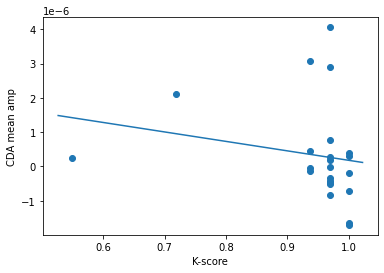

In [79]:
import scipy
from scipy.stats import linregress

x = meancda_df['ACC_1']
y = meancda_df['CDA_1']

print('----------------------------------------------------')
print('Corr K-score vs CDA Amp (Both G/B): {}'.format(scipy.stats.pearsonr(x,y)))
print('----------------------------------------------------')

plt.scatter(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_lim = plt.xlim()
xp = np.linspace(x_lim[0], x_lim[1], 10)
yp = xp*slope+intercept
plt.plot(xp, yp)

plt.xlabel('K-score')
plt.ylabel('CDA mean amp')

----------------------------------------------------
Corr K-score vs CDA Amp (Both G/B): (0.25270566388476695, 0.24468698261839864)
----------------------------------------------------


Text(0, 0.5, 'CDA mean amp')

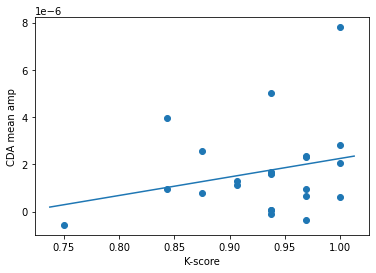

In [80]:
import scipy
from scipy.stats import linregress

x = meancda_df['ACC_2']
y = meancda_df['CDA_2']

print('----------------------------------------------------')
print('Corr K-score vs CDA Amp (Both G/B): {}'.format(scipy.stats.pearsonr(x,y)))
print('----------------------------------------------------')

plt.scatter(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_lim = plt.xlim()
xp = np.linspace(x_lim[0], x_lim[1], 10)
yp = xp*slope+intercept
plt.plot(xp, yp)

plt.xlabel('K-score')
plt.ylabel('CDA mean amp')

----------------------------------------------------
Corr K-score vs CDA Amp (Both G/B): (0.31333790064607353, 0.14542783868091497)
----------------------------------------------------


Text(0, 0.5, 'CDA mean amp')

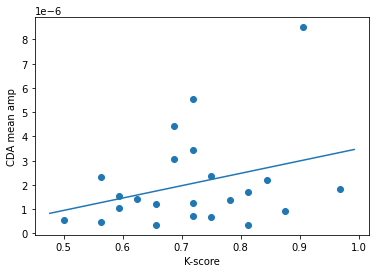

In [81]:
import scipy
from scipy.stats import linregress

x = meancda_df['ACC_4']
y = meancda_df['CDA_4']

print('----------------------------------------------------')
print('Corr K-score vs CDA Amp (Both G/B): {}'.format(scipy.stats.pearsonr(x,y)))
print('----------------------------------------------------')

plt.scatter(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_lim = plt.xlim()
xp = np.linspace(x_lim[0], x_lim[1], 10)
yp = xp*slope+intercept
plt.plot(xp, yp)

plt.xlabel('K-score')
plt.ylabel('CDA mean amp')

----------------------------------------------------
Corr K-score vs CDA Amp (Both G/B): (0.1098220139798138, 0.6178993674480306)
----------------------------------------------------


Text(0, 0.5, 'CDA mean amp')

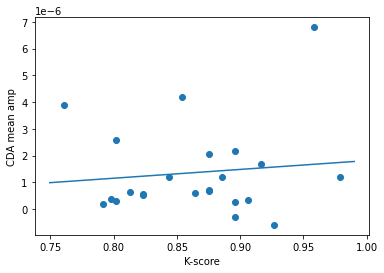

In [101]:
import scipy
from scipy.stats import linregress

x = meancda_df['ACC']
y = meancda_df['CDA']

print('----------------------------------------------------')
print('Corr K-score vs CDA Amp (Both G/B): {}'.format(scipy.stats.pearsonr(x,y)))
print('----------------------------------------------------')

plt.scatter(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_lim = plt.xlim()
xp = np.linspace(x_lim[0], x_lim[1], 10)
yp = xp*slope+intercept
plt.plot(xp, yp)

plt.xlabel('K-score')
plt.ylabel('CDA mean amp')

----------------------------------------------------
Corr K-score vs CDA Amp (Both G/B): (-0.042669989031525996, 0.8467133122802694)
----------------------------------------------------


Text(0, 0.5, 'CDA mean amp')

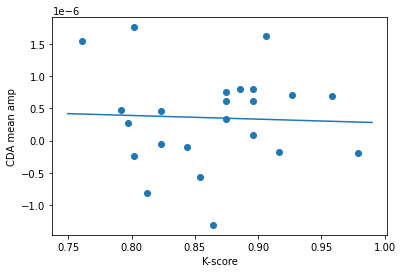

In [103]:
import scipy
from scipy.stats import linregress

x = meancda_df['ACC']
y = meancda_df['CDA_4'] - meancda_df['CDA_2']

print('----------------------------------------------------')
print('Corr K-score vs CDA Amp (Both G/B): {}'.format(scipy.stats.pearsonr(x,y)))
print('----------------------------------------------------')

plt.scatter(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_lim = plt.xlim()
xp = np.linspace(x_lim[0], x_lim[1], 10)
yp = xp*slope+intercept
plt.plot(xp, yp)

plt.xlabel('K-score')
plt.ylabel('CDA mean amp')

## Top 5 vs Low 5 Perf vs CDA -- Subject Variability

In [84]:
report['perf'] = [0] * len(report)

for id in report.index:
    report.at[id, 'perf'] = int(report.at[id, 'good'] / (report.at[id, 'good'] + report.at[id, 'bad']) * 100)

top5 = (report.sort_values(by=['perf'], ascending=False)).index[0:5]
low5 = (report.sort_values(by=['perf'], ascending=False)).index[-6:-1] # Exception here to exclude the very last
print('Top 5: {}'.format(top5))
print('Low 5: {}'.format(low5))

report_sorted = report.sort_values(by=['perf'], ascending=False)
report_sorted

Top 5: Index(['BO090419.bdf', 'CS230419.bdf', 'SS150119.bdf', 'DS220119.bdf',
       'BG160419.bdf'],
      dtype='object')
Low 5: Index(['VK030119.bdf', 'JH290119.bdf', 'LB020419.bdf', 'RM280119.bdf',
       'AP140119.bdf'],
      dtype='object')


,1,2,4,left,right,good,bad,1-left,1-left-CDA,1-left-good,...,4-right-good-CDA,right-good-CDA,4-right-bad,4-right-bad-CDA,right-bad-CDA,checksum,notes,good-CDA,bad-CDA,perf
BO090419.bdf,32,32,32,48,48,94,2,16,0,16,...,3.182316,3.226683,1,8.030483,7.199766,0,0,1.062641,7.199766,97
CS230419.bdf,32,32,32,48,48,92,4,16,0,15,...,9.157788,6.56858,2,15.735632,15.735632,0,0,6.591225,11.303922,95
SS150119.bdf,32,32,32,48,48,89,7,16,0,16,...,1.456287,0.151619,2,0.580355,0.580355,0,0,-0.413097,-0.577109,92
DS220119.bdf,32,32,32,48,48,88,8,16,0,14,...,4.475295,4.737188,3,6.590392,6.590392,1,0,1.479242,1.704458,91
BG160419.bdf,32,32,32,48,48,87,9,16,0,16,...,1.96873,-0.338659,4,-1.699554,1.236616,0,0,0.608361,-0.483957,90
CM190319.bdf,32,32,32,48,48,86,10,16,0,15,...,-0.280694,-0.782789,4,-2.946506,-2.946506,0,0,0.373183,-0.164503,89
MM220419.bdf,32,32,32,48,48,86,10,16,0,16,...,5.838094,4.058232,4,2.181571,-6.946685,1,0,2.588966,-4.340914,89
JC220119.bdf,32,32,32,48,48,86,10,16,0,16,...,-0.098717,-1.405193,4,1.985661,1.086726,0,0,-0.392813,-0.702309,89
LF210119.bdf,32,32,32,48,48,85,11,16,0,15,...,1.668994,-0.166664,5,-0.973262,-0.973262,0,0,0.831101,5.1351,88
IP020519.bdf,32,32,32,48,48,84,12,16,0,16,...,2.236926,1.934291,6,3.879069,5.361511,0,0,1.695575,3.327911,87


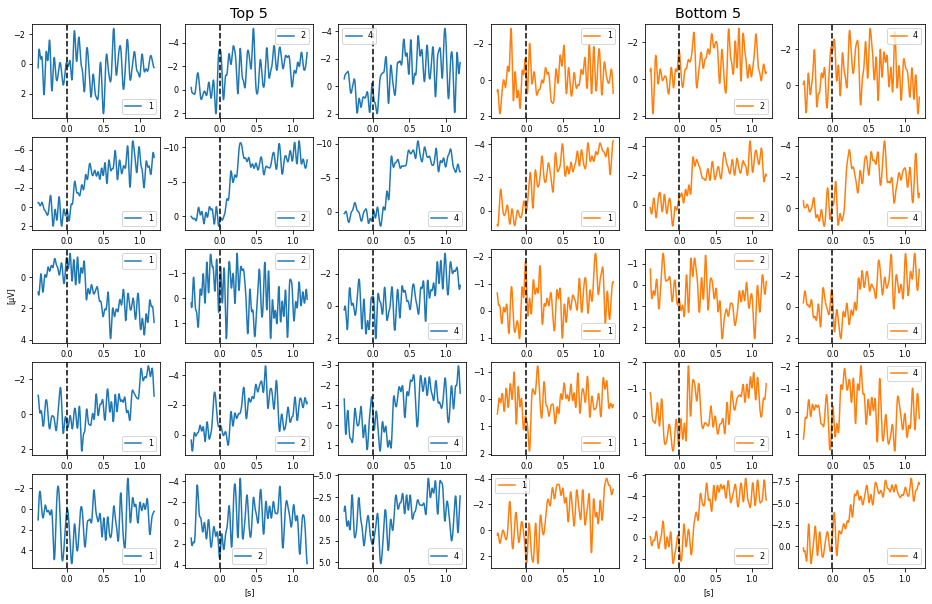

In [83]:
#plt.rcParams.update({'font.size': 8})

top5low5 = list(top5.values) + list(low5.values)
fig, axs = plt.subplots(5, 6, figsize=(16,10))
for i, participant in enumerate(top5low5):
    cur_cda = cda_dict_all[participant]

    if i >= 5:
        offset = 3
        pcolor = 'C1'
    else:
        offset = 0
        pcolor = 'C0'
        
    for j, cond in enumerate(conds):
        axs[i%5,j+offset].plot((times), (cur_cda[cond]['left']['good'] + cur_cda[cond]['right']['good'])/2 *-1e6, color=pcolor, label='{}'.format(cond))
        axs[i%5,j+offset].axvline(x=0, color='k', linestyle='--')
        #axs[0].set_ylim((-6,4))
        axs[i%5,j+offset].invert_yaxis()
        axs[i%5,j+offset].legend()

# Hardcode some labels
plt.rcParams.update({'font.size': 12})
axs[0,1].set_title('Top 5')
axs[0,4].set_title('Bottom 5')
plt.rcParams.update({'font.size': 8})
axs[4,1].set_xlabel('[s]')
axs[4,4].set_xlabel('[s]')
axs[2,0].set_ylabel('[μV]')

plt.savefig("./{}_top5low5.png".format(study_id), dpi=300, format='png')
plt.show()